In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import requests
from io import StringIO

In [4]:
url = 'https://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'

source = requests.get(url).text

In [5]:
poll_data = StringIO(source)

In [6]:
poll_df = pd.read_csv(poll_data)

In [7]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [8]:
poll_df.info

<bound method DataFrame.info of                                 Pollster  Start Date    End Date  \
0              Politico/GWU/Battleground  2012-11-04  2012-11-05   
1                       YouGov/Economist  2012-11-03  2012-11-05   
2                       Gravis Marketing  2012-11-03  2012-11-05   
3                               IBD/TIPP  2012-11-03  2012-11-05   
4                              Rasmussen  2012-11-03  2012-11-05   
5                   JZ Analytics/Newsmax  2012-11-03  2012-11-05   
6                             UPI/CVOTER  2012-11-03  2012-11-05   
7                    Ipsos/Reuters (Web)  2012-11-01  2012-11-05   
8                                    ARG  2012-11-02  2012-11-04   
9    PPP (D-Americans United for Change)  2012-11-02  2012-11-04   
10                                   CNN  2012-11-02  2012-11-04   
11                              ABC/Post  2012-11-01  2012-11-04   
12                                Gallup  2012-11-01  2012-11-04   
13              

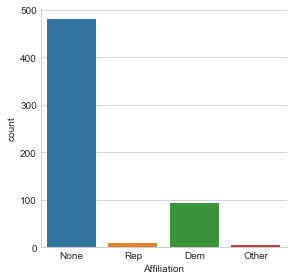

In [9]:
# Check the affiliations of the pollsters by count

sns.factorplot('Affiliation',data=poll_df,kind='count')

In [10]:
# We can see that maximum pollsters were unbiased, but there is a big amount
# of pollsters affiliated to Democrats

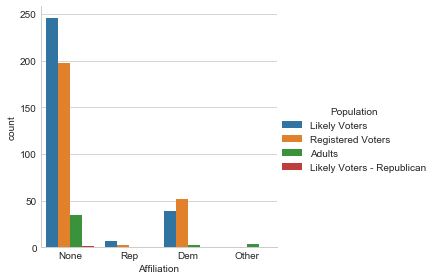

In [11]:
# Categorise the affiliation by Population

sns.factorplot('Affiliation',data=poll_df,hue='Population',kind='count')

In [12]:
# We can see that most of the election data comes from likely voters and 
# registered voters, so it is a good reflection of the population that voted

In [13]:
# Create a new dataframe of the averages of percentages of people who voted
# either candidate or were undecided

avg = pd.DataFrame(poll_df.mean())
avg

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [14]:
# Number of observations,Question Text and Question iteration are useless in 
# this case, so drop them

avg.drop(['Number of Observations','Question Text','Question Iteration']
          ,inplace=True)
avg


,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [15]:
# Create a new dataframe for the standard deviations of the voting percentages

std = pd.DataFrame(poll_df.std())
std

,0
Number of Observations,1621.268369
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN
Question Iteration,0.000000


In [16]:
# Again drop the irrelevant rows from the dataframe

std.drop(['Number of Observations','Question Text','Question Iteration']
          ,inplace=True)
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


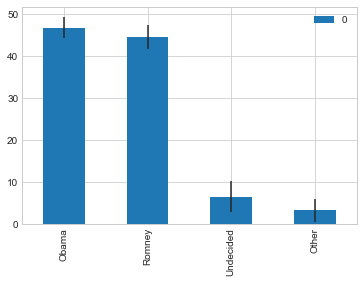

In [17]:
# Plot the voter sentiment for the candidates with their standard deviation

avg.plot(kind='bar',yerr=std)

In [18]:
# We see that Obama and Romney had equal voter sentiment, given they are
# within each others standard deviation. Almost 10% of population was 
# undecided and almost 5% population voted for other candidates

In [19]:
# Merge both the dataframes

poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['Average','Standard Deviation']
poll_avg

,Average,Standard Deviation
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


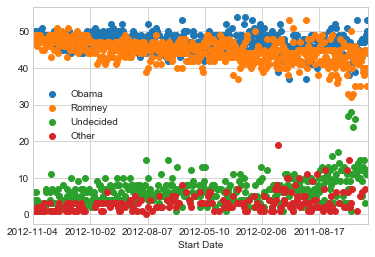

In [20]:
# Plot a time series graph of the voting trend over the time period leading up to the election

poll_df.plot(x='Start Date',y=['Obama','Romney','Undecided','Other'],linestyle='',marker='o')

In [21]:
# The curve is read from right to left. We see that initially Obama had slightly higher voter sentiment, but with time, the
# difference between Obama and Romney decreased and they almost were equal
# Also, the undecided people and ones voting other condidates also reduced up to the time leading to the elections

In [22]:
# We can create a new column to measure the difference between the support count of Obama and Romney

poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100

In [23]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [24]:
# Since we are doing Obama - Romney, a positive difference indicates support for Obama and negative difference supports Romney

In [25]:
# Group the dataframe using the start date and calculate the average of all polls conducted on the same date

poll_df = poll_df.groupby('Start Date',as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


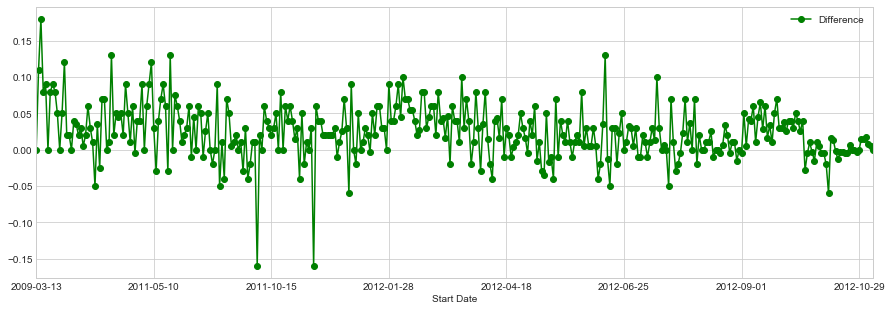

In [26]:
poll_df.plot(x='Start Date',y='Difference',linestyle='-',marker='o',color='green',figsize=(15,5))

In [27]:
# From a glance, it looks like Obama was the favored candidate out of the two, but on 2 particular dates in October 2011, the
# support was heavily in favor of Romney

In [28]:
# There were 3 debates in October 2012. We can plot the voter sentiment for October and see if the debates changed any sentiment

# Make a loop to grab the indices for the month of October in 2012

xlimit = []
row = 0

for day in poll_df['Start Date']:
    if day[0:7] == '2012-10':
        xlimit.append(row)
        row += 1
    else:
        row += 1
        
print(min(xlimit))
print(max(xlimit))

325
352


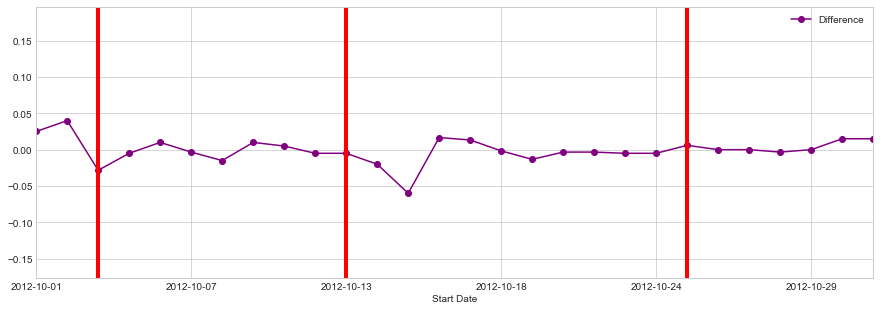

In [29]:
# This means indices 325 to 352 correspond to the month of October in 2012
# Debates were held on 3rd October, 11th October and 22nd October respectively. I will mark those on the plot

poll_df.plot(x='Start Date',y='Difference',linestyle='-',marker='o',color='purple',figsize=(15,5),xlim=(325,352))

# October 3rd
plt.axvline(x=325+2,linewidth=4,color='red')

# October 11th
plt.axvline(x=325+10,linewidth=4,color='red')

# October 22nd
plt.axvline(x=325+21,linewidth=4,color='red')

In [30]:
# After the 1st debate, voter sentiment slightly increased for Obama
# After the 2nd debate, voter sentiment increased for Romney within the next 2 days
# The 3rd debate did not have much of a difference on voter sentiment

In [31]:
# Now I will analyse the data for the election donations

donor_df = pd.read_csv('Election_Donor_Data.csv')

C:\Users\arjun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [33]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [34]:
# A value count of how many people donated what amount of money

donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [35]:
# We notice that maximum amount of people donated $100, then $50 and so on

In [36]:
# Calculate the mean and standard deviation for the amount of donations

don_mean = donor_df['contb_receipt_amt'].mean()

don_std = donor_df['contb_receipt_amt'].std()

print('The mean amount of donation was $%.2f with a standard deviation of $%.2f' %(don_mean,don_std))

The mean amount of donation was $298.24 with a standard deviation of $3749.67


In [37]:
# We can see that the standard deviation is abnormally large, given the mean amount. Some large donations might be affecting the
# distribution of donation amounts

In [38]:
# We can separately work with the donation amounts to see the data

donations = donor_df['contb_receipt_amt'].copy()

donations.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [39]:
# We can see a lot of negative values in the donations. These are actually refunds issued to the candidates so we do not want
# those values. We are interested only in the positive values which would reduce the deviation in the donation amount data

donations = donations[donations>0]

In [40]:
donations.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

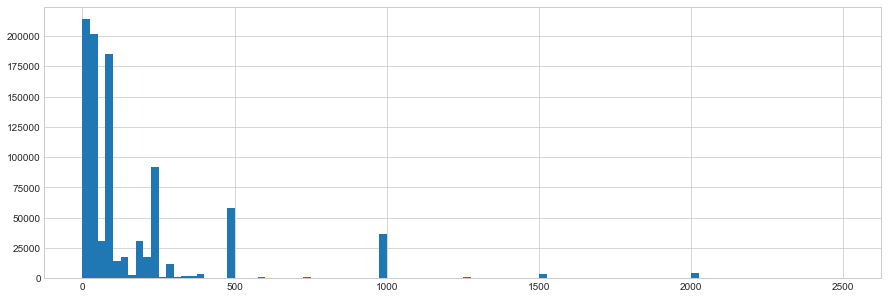

In [41]:
# Common donations are round numbered figures. We can plot a histogram of all donation amounts from $0 to $2500 to check that

common_donations = donations[donations<2500]

common_donations.hist(bins=100,figsize=(15,5))

In [42]:
# According to the intuition from the data, we can see that maximum donations were round figured amounts

In [43]:
# Make a list of all the candidates standing for the election

candidates = donor_df['cand_nm'].unique()

In [44]:
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [45]:
# Make a column 'Party' which states the party affiliation of the candidate 
# Create a dictionary with keys as candidate names and values as party names

party = {'Bachmann, Michelle':'Republican', 'Romney, Mitt':'Republican', 'Obama, Barack':'Democrat',
       "Roemer, Charles E. 'Buddy' III":'Republican', 'Pawlenty, Timothy':'Republican',
       'Johnson, Gary Earl':'Republican', 'Paul, Ron':'Republican', 'Santorum, Rick':'Republican', 'Cain, Herman':'Republican',
       'Gingrich, Newt':'Republican', 'McCotter, Thaddeus G':'Republican', 'Huntsman, Jon':'Republican',
       'Perry, Rick':'Republican'}

In [46]:
# Use the dictionary to map the party affiliations on the candidate names

donor_df['Party'] = donor_df['cand_nm'].map(party)

In [47]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [48]:
# Remove all negative donation amounts from the dataframe

donor_df = donor_df[donor_df['contb_receipt_amt']>0]

In [49]:
# Let us see how many people donated for each of the candidates

donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [50]:
# Here, we can see that Obama had the highest donor count, considering the fact that he was the only Democrat candidate

In [51]:
# Now we can calculate the exact dollar amount of donations that each candidate received

cand_amt = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

# Make a loop to read out all the candidate names and their dollar values raised

i = 0

for ind in cand_amt:
    print('%s raised $%.0f' %(cand_amt.index[i],ind))
    print('\n')

Bachmann, Michelle raised $2711439


Bachmann, Michelle raised $7101082


Bachmann, Michelle raised $12832770


Bachmann, Michelle raised $3330373


Bachmann, Michelle raised $566962


Bachmann, Michelle raised $39030


Bachmann, Michelle raised $135877427


Bachmann, Michelle raised $21009620


Bachmann, Michelle raised $6004819


Bachmann, Michelle raised $20305754


Bachmann, Michelle raised $373010


Bachmann, Michelle raised $88335908


Bachmann, Michelle raised $11043159




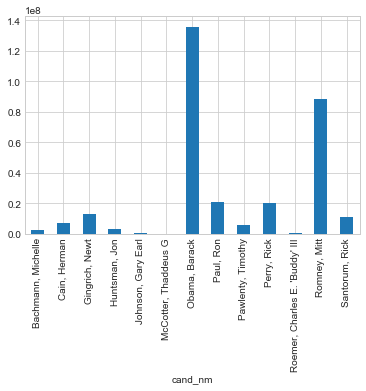

In [52]:
# Reading the numbers is easy, but it is difficult to make comparisons without a graphical representation

cand_amt.plot(kind='bar')

In [53]:
# Visually the plot allows us to compare very easily. Obama is clearly the frontrunner and Romney leads amongst the Republicans

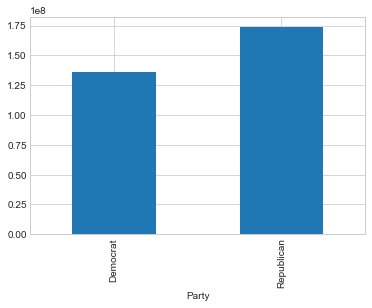

In [54]:
# It would be interesting to see if the sum of donations of all Republican condidates matched Obama's raised sum

donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [55]:
# Now lets see that how much people from different fields donated money to the parties

occu_df = donor_df.pivot_table('contb_receipt_amt',index='contbr_occupation',columns=['Party'],aggfunc='sum')

In [56]:
occu_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [57]:
occu_df.shape

(45067, 2)

In [58]:
# This shows that there are 45067 different occupation groups who have donated money to either of the parties

In [59]:
# Since small amounts do not matter that much in donations, let us see how many occupation groups donated over a million dollars

occu_df = occu_df[occu_df.sum(1)>1000000]

In [60]:
occu_df.shape

(31, 2)

In [61]:
# So there are 31 occupation groups that donated over a million dollars respectively to either parties

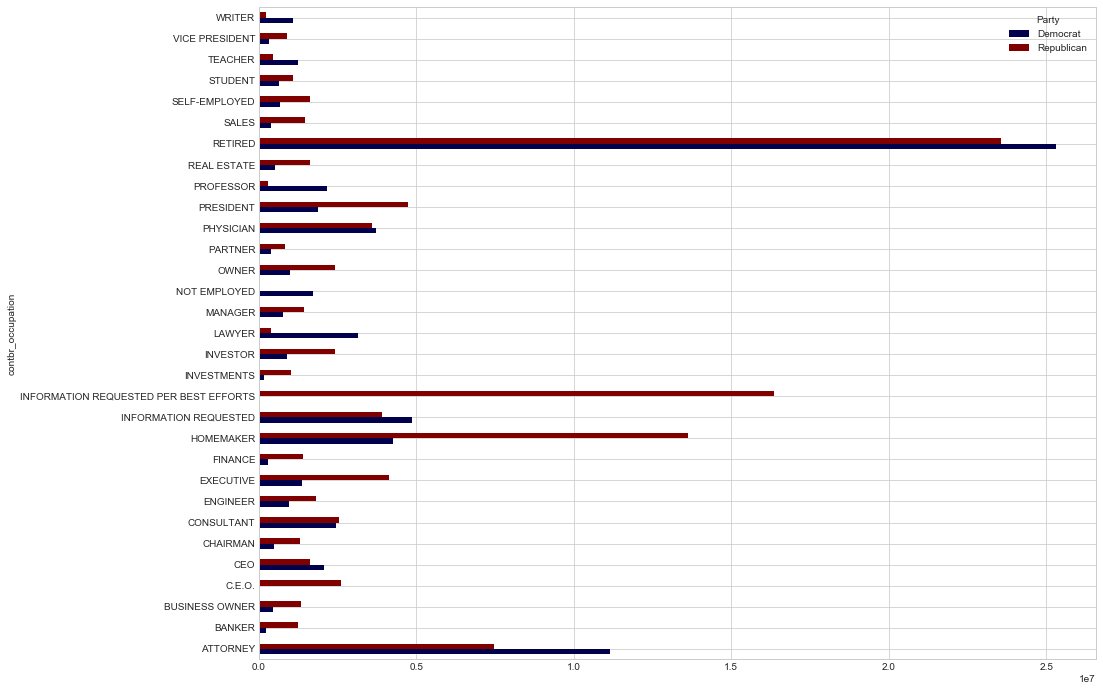

In [62]:
# Plot how much each occupation group donated to which party

occu_df.plot(kind='barh',cmap='seismic',figsize=(15,12))

In [63]:
# There are 2 occupation groups namely 'Information requested per best efforts' and 'Information requested' which can be removed

occu_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [64]:
# Also, there is a 'CEO' and a 'C.E.O.' occupation which is the same, so we can sum them up and remove one of them

occu_df.loc['CEO'] = occu_df.loc['CEO'] + occu_df.loc['C.E.O.']

occu_df.drop(['C.E.O.'],axis=0,inplace=True)

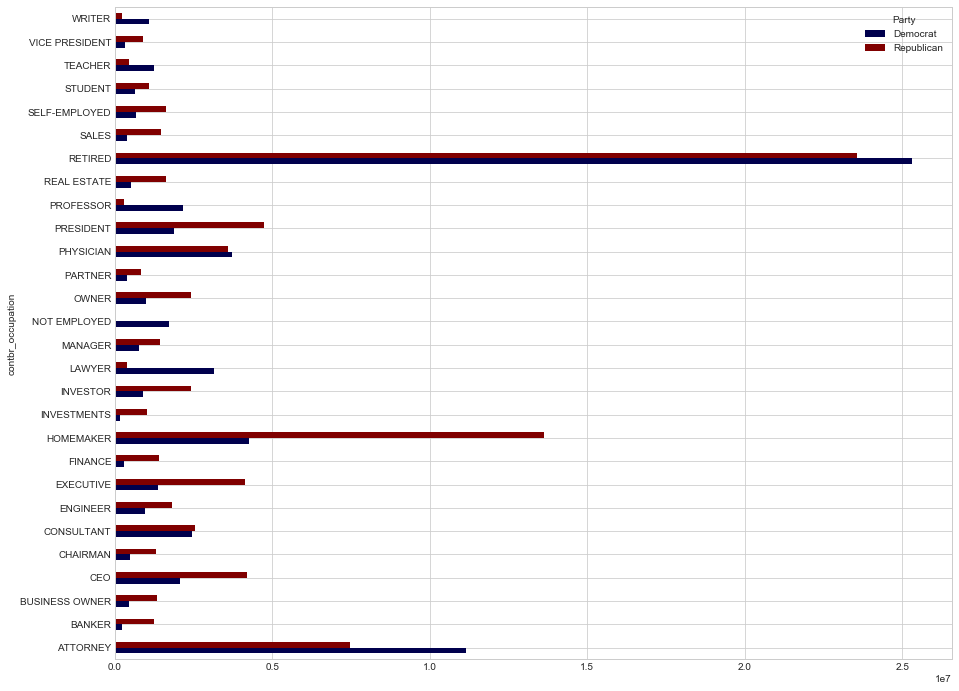

In [65]:
occu_df.plot(kind='barh',figsize=(15,12),cmap='seismic')

In [66]:
# Necessary changes have been made in the plot